# Recurrent Neural Networks
## Just as CNNs were better for image tasks , RNNs are widely used for Sequence Data.
# Types Of Sequential Data : 
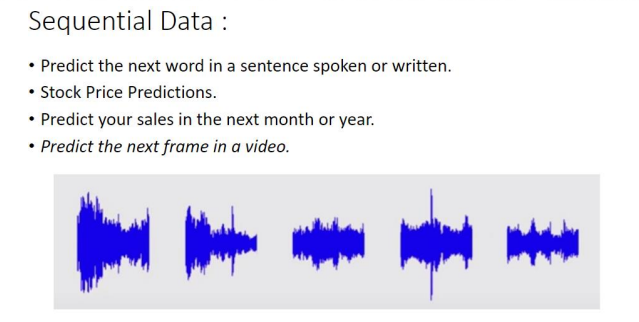

# Time Series Data :
### for examples sales over years , anything that varies over time with a measurable relation.
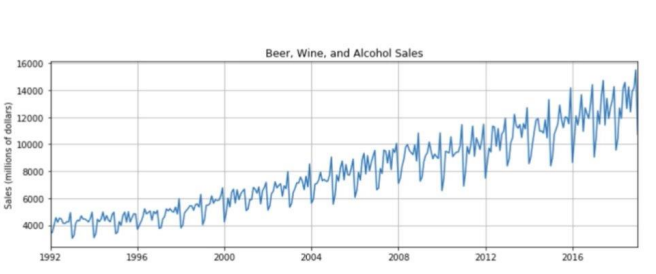

## So our task in this case is to predict the sales in the next defined years , for example something like this.
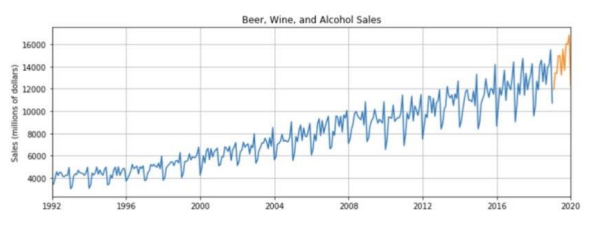

##### Or predicting the next work in a sentence
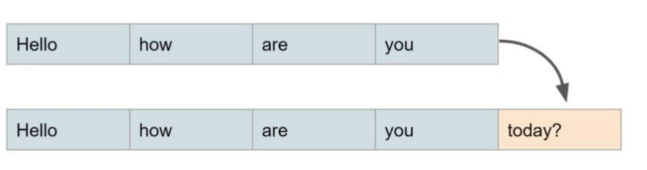

## What are Recurrent Neurons? 
### They are neurons that sends the output to next layer and also SENDS IT BACK TO ITSELF. thats how we get memory.
### this can be explained better visually
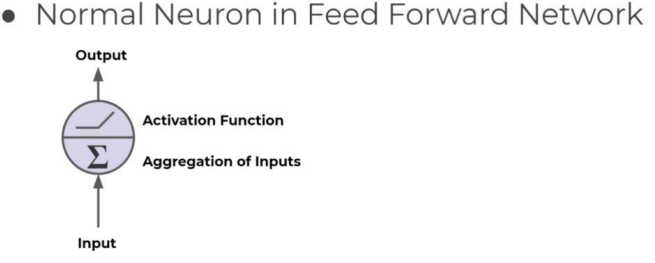
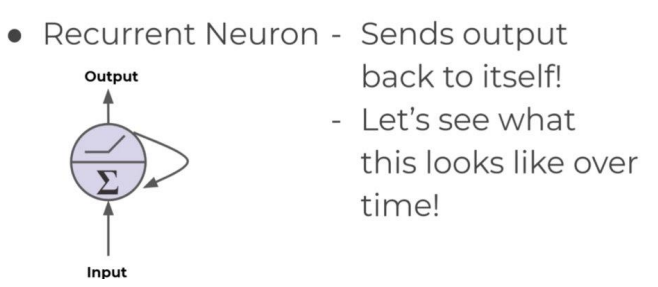
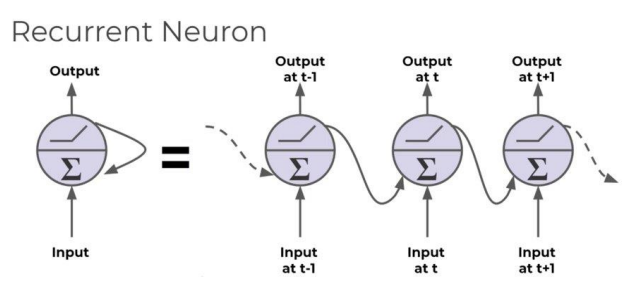
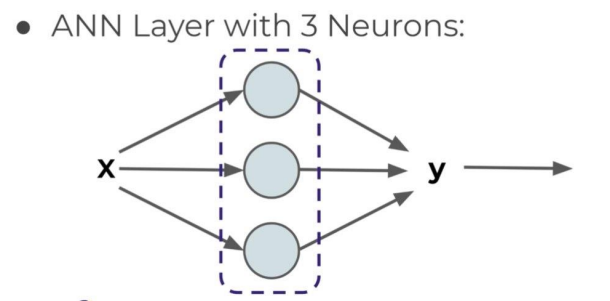
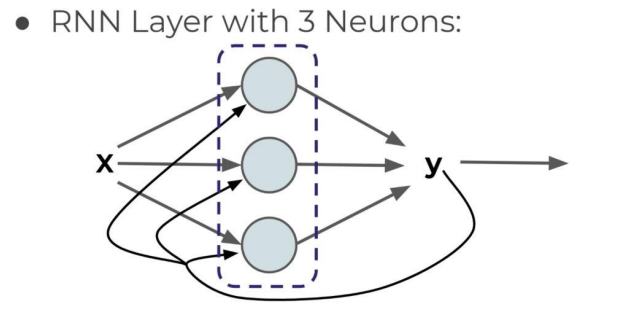

#### Later on we will see the matrix representation of this kind of architectures.

# How flexiable are RNNs?
### They are one of the networks that you can manipulatre for different tasks.
# Example 1 : Sequence to Sequence : 
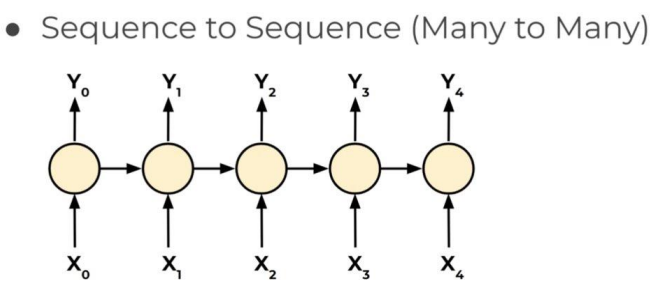
### for example , give it a frame and it tries to predict the next frame.


# Example 2 : Vector to sequence :
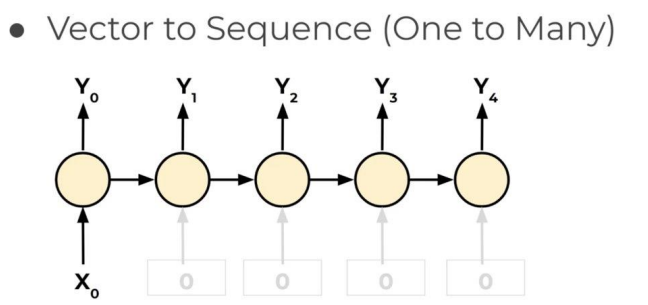
### for example , give it a context and it tries to describe it. give it a word and it tries to explain it.


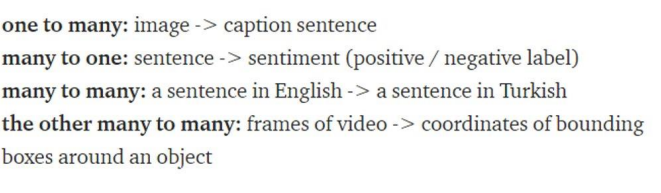

# Matrix Representation : 1 ) for feed forward networks it looks like this 
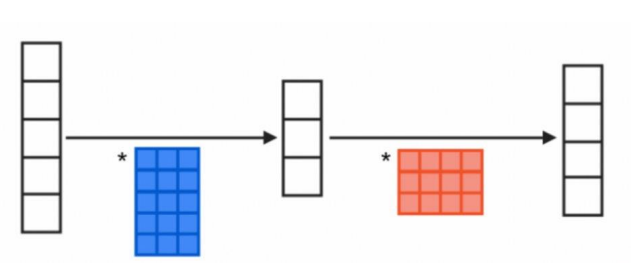

# For RNNs "note how there's memory feed back" , at time 0 :
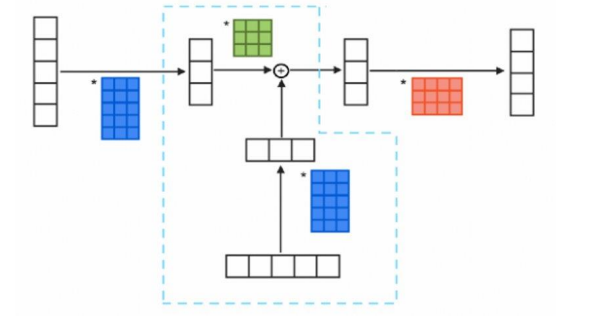
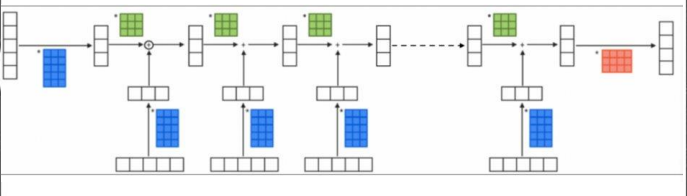
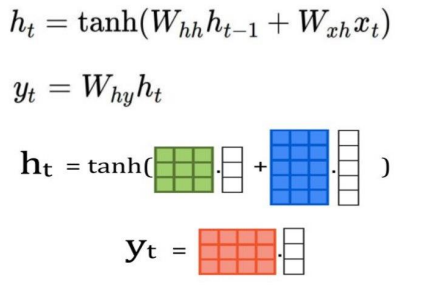

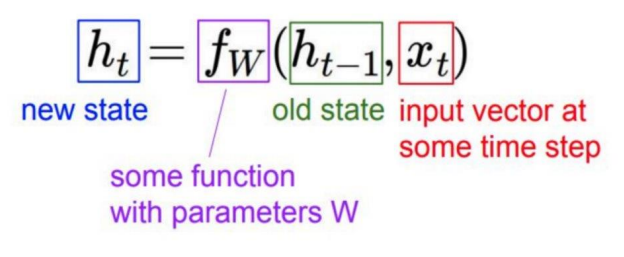

### Tanh is a commen activation function for RNNs because normal relu tends to vanish the gradients.
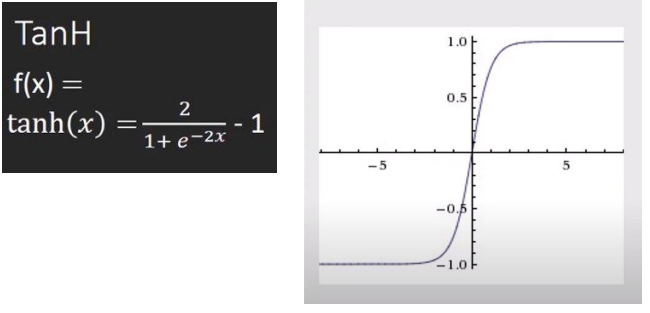

# Issues with RNNs :
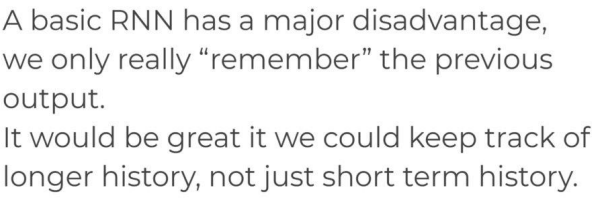
#### for example :
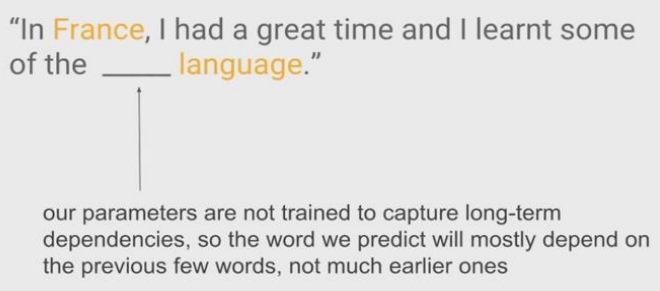
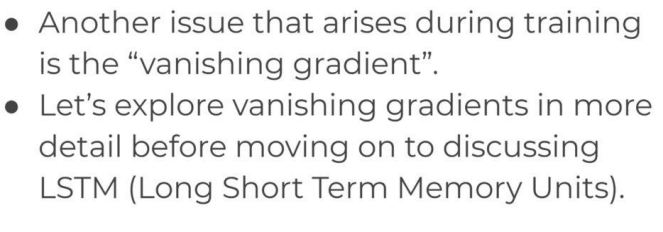
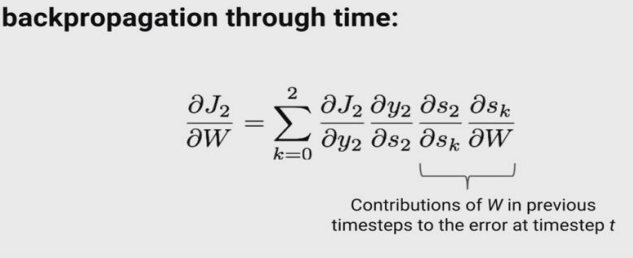
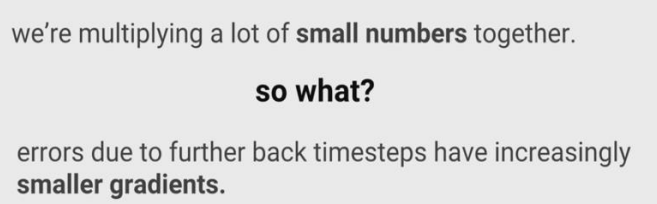

# How to solve vanishing gradients ? 
### 1 - Use Tanh & use xavier weight initialization method.
### 2- Use LSTMs instead of RNNS which is short for long short term memory

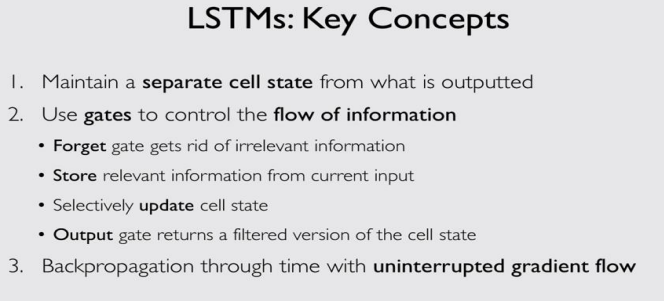

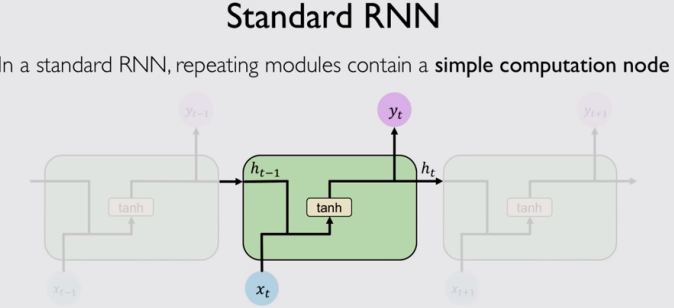
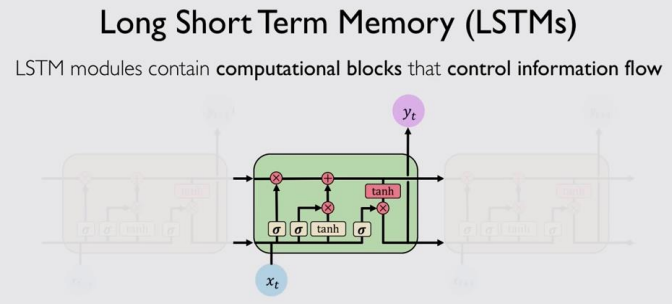

## Information are added or removed through GATES , gates optionally let information through , via a sigmoid layer.
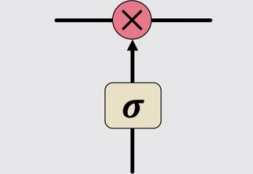

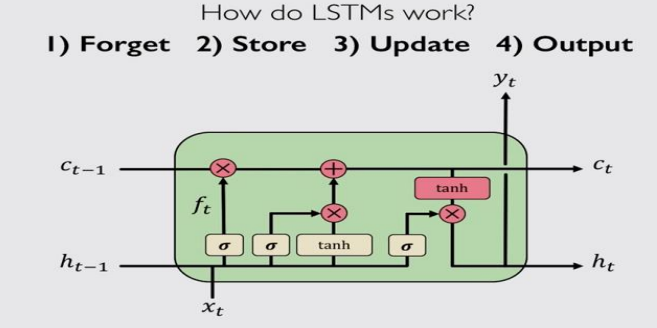
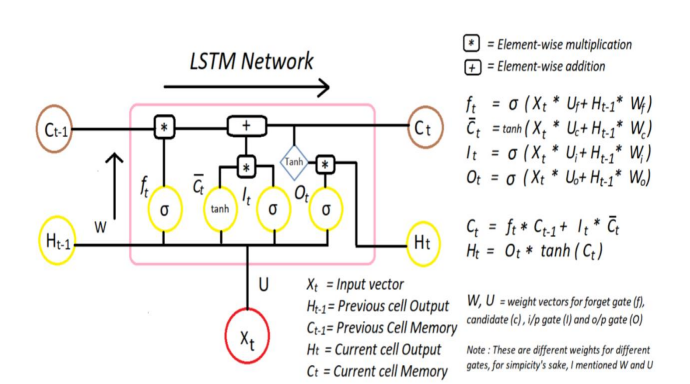
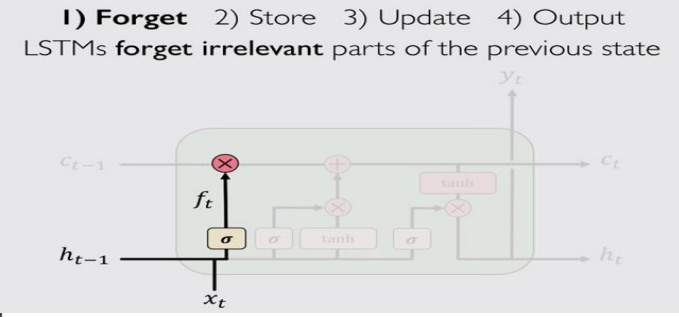

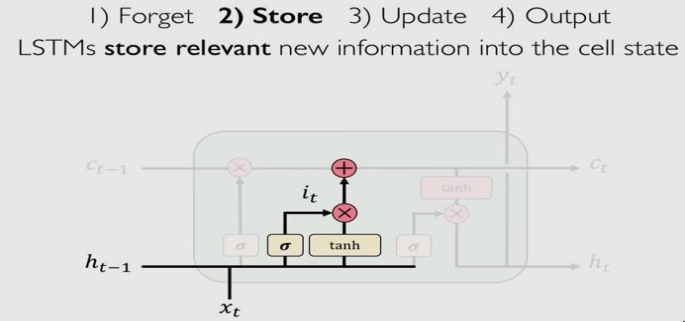
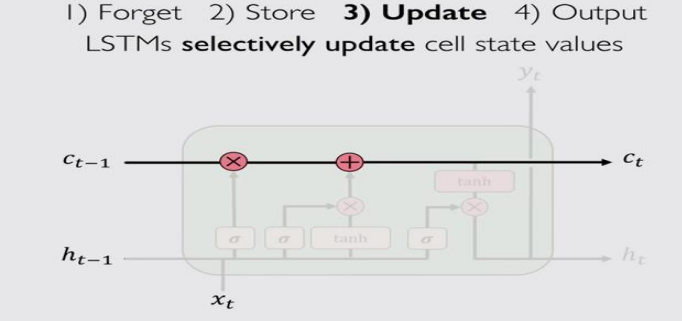
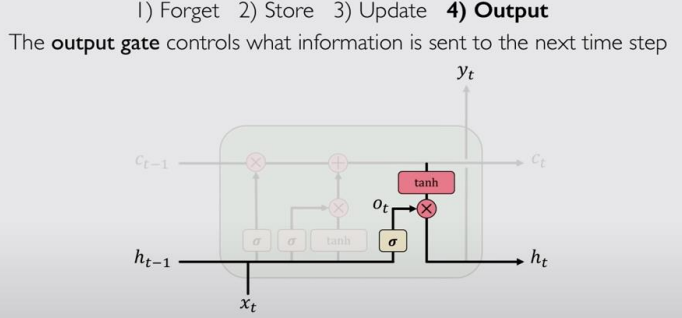

#### it's just another architercture that's proven to work the best on sequential data , don't worry if u dont understand everything at the first look.


# Code is going to look almost the same as ANN , CNNs , keras made everything easy.

# The data set : google stock prices. we will try the stock price in 2017 based on it's price in previous years.

In [3]:
# Recurrent Neural Network
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
19/19 [==============================] - 8s 108ms/step - loss: 0.0747
Epoch 2/100
19/19 [==============================] - 2s 100ms/step - loss: 0.0109
Epoch 3/100
19/19 [==============================] - 2s 102ms/step - loss: 0.0072
Epoch 4/100
19/19 [==============================] - 2s 102ms/step - loss: 0.0058
Epoch 5/100
19/19 [==============================] - 2s 95ms/step - loss: 0.0060
Epoch 6/100
19/19 [==============================] - 2s 97ms/step - loss: 0.0056
Epoch 7/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0057
Epoch 8/100
19/19 [==============================] - 2s 104ms/step - loss: 0.0051
Epoch 9/100
19/19 [==============================] - 2s 101ms/step - loss: 0.0053
Epoch 10/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0052
Epoch 11/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0052
Epoch 12/100
19/19 [==============================] - 2s 100ms/step - loss: 0.0043
Epoch 13/100
19

19/19 [==============================] - 2s 102ms/step - loss: 0.0021


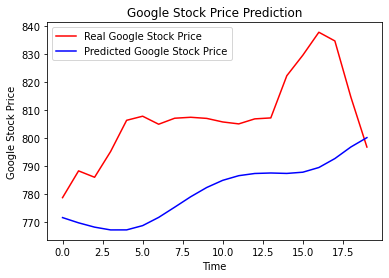

In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()